In [1]:
import time
n_multi = 50

import multiprocessing as mp
import numpy as np
from deap.benchmarks import rastrigin
import matplotlib.pyplot as plt
import matplotlib.animation as animation


%matplotlib inline

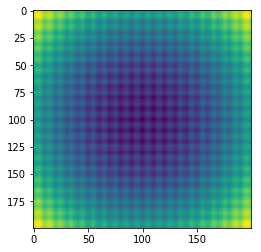

In [2]:
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
xm,ym = np.meshgrid(x,y)
z = np.zeros_like(xm)
for k in range(xm.shape[1]):
    for i in range(xm.shape[0]):
        z[i,k] = rastrigin((xm[i,k],ym[i,k]))[0]
plt.imshow(z)

In [23]:
def sample(mu,cov = np.eye(2)):   
    r = np.random.randn(2)
    r = np.dot(np.linalg.cholesky(cov),r)
    r = r + mu
    return r

def evaluation(params):
    params = (params[0],params[1])
    score = rastrigin(params)[0]
    return - score + np.random.randn() * 0

In [4]:
#random search
mu = np.zeros(2)+3

t = time.time()
best_score=-1000
for k in range(1000):
    param = sample(mu)
    score = evaluation(param)
    if score > best_score:
        best_score = score
        best_param = param
    
print('best:',best_score)
print('time:',time.time() - t)

best: -7.489344521435992
time: 0.02687382698059082


In [12]:
#simple ES 
n_popu = 2000
n_best = 200
mu = np.zeros(2)+10

t = time.time()
best_score = -10000
for k in range(20):
    params = np.array([sample(mu) for _ in range(n_popu)])
    scores = [evaluation(param) for param in params]
    best_inds = np.argsort(scores)[::-1][:n_best]
    mu = np.mean(params[best_inds],axis=0)

    # plt.imshow(z,extent = [-10,10,-10,10])
    # plt.scatter(params[:,0],params[:,1],color='red')
    # plt.scatter(params[best_inds,0],params[best_inds,1],color='blue')
    # plt.scatter(mu[0],mu[1],color = 'green')

    if best_score < np.max(scores):
        best_score = np.max(scores)

print('best:',best_score)
print('time:',time.time() - t)

best: -0.02666475237049326
time: 0.886836051940918


In [13]:
def plot(params,best_inds,mu,z = z):
    img1 = plt.imshow(z,extent = [-10,10,-10,10])
    img2 = plt.scatter(params[:,0],params[:,1],color='red')
    img3 = plt.scatter(params[best_inds,0],params[best_inds,1],color='blue')
    img4 = plt.scatter(mu[0],mu[1],color = 'green')
    return [img1,img2,img3,img4]

In [16]:
#simple ES multiprocess
n_popu = 2000
n_best = 200
mu = np.zeros(2)+10

t = time.time()
best_score = -10000
pool = mp.Pool(10)
imgs = []
fig = plt.figure()
for k in range(20):
    params = np.array([sample(mu) for _ in range(n_popu)])
    scores = pool.map(evaluation,params)
    best_inds = np.argsort(scores)[::-1][:n_best]
    mu = np.mean(params[best_inds],axis=0)
    if best_score < np.max(scores):
        best_score = np.max(scores)
    
    img = plot(params,best_inds,mu)
    imgs.append(img)
    
ani = animation.ArtistAnimation(fig, imgs)
ani.save('ES_search.gif', writer="imagemagick")
plt.close()
print('best:',best_score)
print('time:',time.time() - t)

best: -0.0359541909359784
time: 3.944087028503418


In [24]:
#simple CMAES 
n_popu = 2000
n_best = 200
mu = np.zeros(2)+10
cov = np.eye(2)

t = time.time()
best_score = -10000
score_best_rec = []
score_ave_rec = []
imgs = []
fig = plt.figure()
for k in range(20):
    params = np.array([sample(mu,cov) for _ in range(n_popu)])
    scores = [evaluation(param) for param in params]
    best_inds = np.argsort(scores)[::-1][:n_best]
    
    params_bests = params[best_inds]
    sigx,sigy = np.sqrt(np.mean((params_bests - mu)**2,axis=0))
    cov = np.dot((params_bests-mu).T,params_bests-mu)/n_best
    mu = np.mean(params_bests,axis=0)

    img = plot(params,best_inds,mu)
    imgs.append(img)
    
    if best_score < np.max(scores):
        best_score = np.max(scores)

    score_best_rec.append(best_score)
    score_ave_rec.append(np.mean(scores))
ani = animation.ArtistAnimation(fig, imgs)
ani.save('CMAES_search.gif', writer="imagemagick")
plt.close()

print('best:',best_score)
print('time:',time.time() - t)

best: -9.851532922766637e-10
time: 3.2916758060455322


In [ ]:
plt.plot(score_best_rec)
plt.plot(score_ave_rec)